# Implementing SGD Classifier with Logloss and L2 regularization from scratch

<font color='red'> Importing packages</font>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import linear_model

<font color='red'>Creating custom dataset</font>

In [2]:
# please don't change random_state
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)
# make_classification is used to create custom dataset 
# Please check this link (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) for more details

In [3]:
X.shape, y.shape

((50000, 15), (50000,))

<font color='red'>Splitting data into train and test </font>

In [4]:
#please don't change random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

# SGD classifier using sklearn

In [6]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf
# Please check this documentation (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) 

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)

In [7]:
clf.fit(X=X_train, y=y_train) # fitting our model

-- Epoch 1
Norm: 0.77, NNZs: 15, Bias: -0.316653, T: 37500, Avg. loss: 0.455552
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.472747, T: 75000, Avg. loss: 0.394686
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580082, T: 112500, Avg. loss: 0.385711
Total training time: 0.04 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.658292, T: 150000, Avg. loss: 0.382083
Total training time: 0.06 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.719528, T: 187500, Avg. loss: 0.380486
Total training time: 0.07 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.763409, T: 225000, Avg. loss: 0.379578
Total training time: 0.09 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.795106, T: 262500, Avg. loss: 0.379150
Total training time: 0.10 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.819925, T: 300000, Avg. loss: 0.378856
Total training time: 0.12 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.837805, T: 337500, Avg. loss: 0.

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)

In [8]:
clf.coef_, clf.coef_.shape, clf.intercept_
#clf.coef_ will return the weights
#clf.coef_.shape will return the shape of weights
#clf.intercept_ will return the intercept term

(array([[-0.42336692,  0.18547565, -0.14859036,  0.34144407, -0.2081867 ,
          0.56016579, -0.45242483, -0.09408813,  0.2092732 ,  0.18084126,
          0.19705191,  0.00421916, -0.0796037 ,  0.33852802,  0.02266721]]),
 (1, 15),
 array([-0.8531383]))

## <font color='red' size=5> Implement Logistic Regression with L2 regularization Using SGD: without using sklearn </font>






1.  We will be giving you some functions, please write code in that functions only.

2.  After every function, we will be giving you expected output, please make sure that you get that output. 






<br>

* Initialize the weight_vector and intercept term to zeros (Write your code in <font color='blue'>def initialize_weights()</font>)

* Create a loss function (Write your code in <font color='blue'>def logloss()</font>) 

 $log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$
- for each epoch:

    - for each batch of data points in train: (keep batch size=1)

        - calculate the gradient of loss function w.r.t each weight in weight vector (write your code in <font color='blue'>def gradient_dw()</font>)

        $dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)})$ <br>

        - Calculate the gradient of the intercept (write your code in <font color='blue'> def gradient_db()</font>) <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>check this</a>

           $ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t}))$

        - Update weights and intercept (check the equation number 32 in the above mentioned <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>pdf</a>): <br>
        $w^{(t+1)}← w^{(t)}+α(dw^{(t)}) $<br>

        $b^{(t+1)}←b^{(t)}+α(db^{(t)}) $
    - calculate the log loss for train and test with the updated weights (you can check the python assignment 10th question)
    - And if you wish, you can compare the previous loss and the current loss, if it is not updating, then
        you can stop the training
    - append this loss in the list ( this will be used to see how loss is changing for each epoch after the training is over )


<font color='blue'>Initialize weights </font>

In [9]:
def initialize_weights(dim):
    w = np.zeros_like(dim)
    b = 0
    return w,b

In [66]:
dim=X_train[0] 
w,b = initialize_weights(dim)
print('w =',(w))
print('b =',str(b))

w = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b = 0


<font color='blue'>Compute sigmoid </font>

$sigmoid(z)= 1/(1+exp(-z))$

In [12]:
def sigmoid(z):
    sig = 1 / (1 + np.exp(-z))

    return sig

<font color='blue'> Compute loss </font>

$log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$

In [53]:
def logloss(y_true,y_pred):
    n = len(y_true)
    loss = 0
    for i in range(0, len(y_true)):   
        loss = loss + (y_true[i]*np.log10(y_pred[i]+10**-20) + (1-y_true[i])*np.log10(1-y_pred[i]+10**-20))
    loss = -1*loss/n
    return loss

<font color='blue'>Compute gradient w.r.to  'w' </font>

$dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)})$ <br>

In [27]:
def gradient_dw(x,y,w,b,alpha,N):
    dw = np.zeros(len(x))
    dw = dw + x*(y-sigmoid(np.dot(w,x)+b)-alpha*w.transpose()/N)
    return dw

<font color='blue'>Compute gradient w.r.to 'b' </font>

$ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t}))$

In [67]:
def gradient_db(x,y,w,b):
    db = y-sigmoid((np.dot(w,x)) + b)
    return db

<font color='blue'> Implementing logistic regression</font>

In [31]:
def predict(w,b, X):
    N = len(X)
    predict_z = []
    for i in range(0, N):
        z = np.dot(w,X[i])+b
        predict_z.append(sigmoid(z))
    return predict_z

In [71]:
from tqdm.notebook import tqdm
def train(X_train,y_train,X_test,y_test,epochs,alpha,eta0):
    w,b = initialize_weights(X_train[0])
    train_loss = []
    test_loss = []
    for i in tqdm(range(0, epochs)):
        pred_X_train = 0
        pred_y_test = 0
        for j in range(0, len(X_train)):
            N = len(X_train)
            dw = gradient_dw(X_train[j],y_train[j],w,b,alpha,N)
            db = gradient_db(X_train[j],y_train[j],w,b)
            w = w + eta0*(dw)
            b = b + eta0*(db)
        pred_X_train = predict(w,b,X_train)
        tr_loss = logloss(y_train,pred_X_train)
        train_loss.append(tr_loss)    

        pred_y_test = predict(w,b,X_test)
        te_loss = logloss(y_test,pred_y_test)
        test_loss.append(te_loss)
    
    return w,b,train_loss,test_loss

In [72]:
alpha=0.0001
eta0=0.0001
N=len(X_train)
epochs=50
w,b,train_loss,test_loss=train(X_train,y_train,X_test,y_test,epochs,alpha,eta0)

In [73]:
print(w,b)
print(clf.coef_,clf.intercept_)

[-0.42979244  0.1930352  -0.14846992  0.33809366 -0.22128236  0.56994894
 -0.44518164 -0.08990399  0.22182949  0.17382965  0.19874847 -0.00058427
 -0.08133409  0.33909012  0.02298795] -0.892252167976083
[[-0.42336692  0.18547565 -0.14859036  0.34144407 -0.2081867   0.56016579
  -0.45242483 -0.09408813  0.2092732   0.18084126  0.19705191  0.00421916
  -0.0796037   0.33852802  0.02266721]] [-0.8531383]


<font color='red'>Goal of assignment</font>

Compare your implementation and SGDClassifier's the weights and intercept, make sure they are as close as possible i.e difference should be in terms of 10^-3

In [76]:
# these are the results we got after we implemented sgd and found the optimal weights and intercept
w-clf.coef_, b-clf.intercept_


(array([[-0.00642552,  0.00755954,  0.00012044, -0.00335041, -0.01309566,
          0.00978315,  0.00724319,  0.00418414,  0.01255629, -0.00701161,
          0.00169656, -0.00480343, -0.00173039,  0.0005621 ,  0.00032074]]),
 array([-0.03911387]))

<font color='blue'>Plot epoch number vs train , test loss </font>

* epoch number on X-axis
* loss on Y-axis

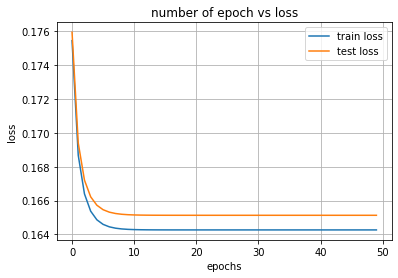

In [77]:
import matplotlib.pyplot as plt


plt.plot(range(0, epochs, 1), train_loss, label = 'train loss')
plt.plot(range(0, epochs, 1), test_loss, label = 'test loss')

plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('number of epoch vs loss')
plt.grid()
plt.show()


In [78]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(0, N):
        z=np.dot(w,X[i])+b
        if sigmoid(z) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)
print(1-np.sum(y_train - pred(w,b,X_train))/len(X_train))
print(1-np.sum(y_test  - pred(w,b,X_test))/len(X_test))

0.9522133333333334
0.95
